# K-nearest neighbors (KNN) classification - Basics

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/trees/knn_classification-basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data set

To illustrate the concepts we will use a synthetic data set which we generate using the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function

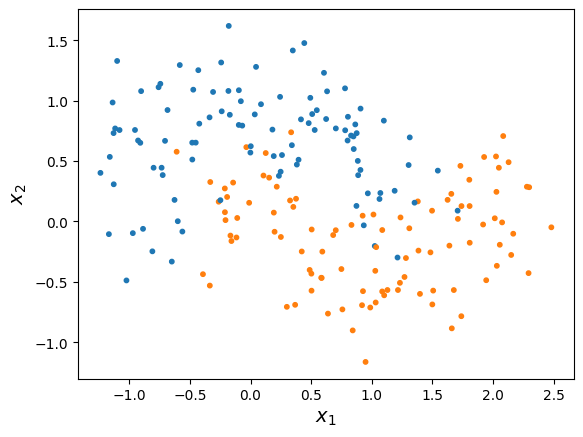

In [2]:
X, y = make_moons(200, noise=0.3, random_state=1)

colors = np.array(['tab:blue', 'tab:orange'])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

## KNN classification training

Fitting a classification tree model follows the same syntax as other models in scikit-learn. The class [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) from scikit-learn implements KNN classification.

In [3]:
clf = KNeighborsClassifier()
clf.fit(X, y)

KNeighborsClassifier()

In [4]:
def plot_dec_bound(clf, X, y, ax):
    '''
    Plot decision boundaries
    '''
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z-100, cmap=plt.cm.Greens)

    colors = np.array(['tab:blue', 'tab:orange'])
    ax.scatter(X[:, 0], X[:, 1], s=12, color=colors[y])
    
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)

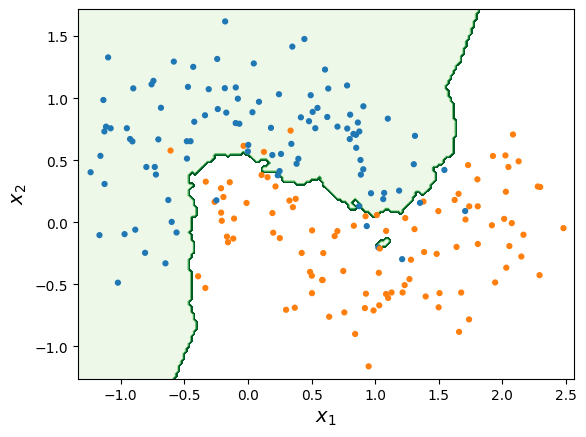

In [5]:
fig, ax = plt.subplots(1, 1)
plot_dec_bound(clf, X, y, ax)
plt.show()

## Hyper-parameter K (number of neighbors)

Depending on the value of the hyper-parameter K (number of neighbors used to define prediction), the classification can be over-fitted or not.

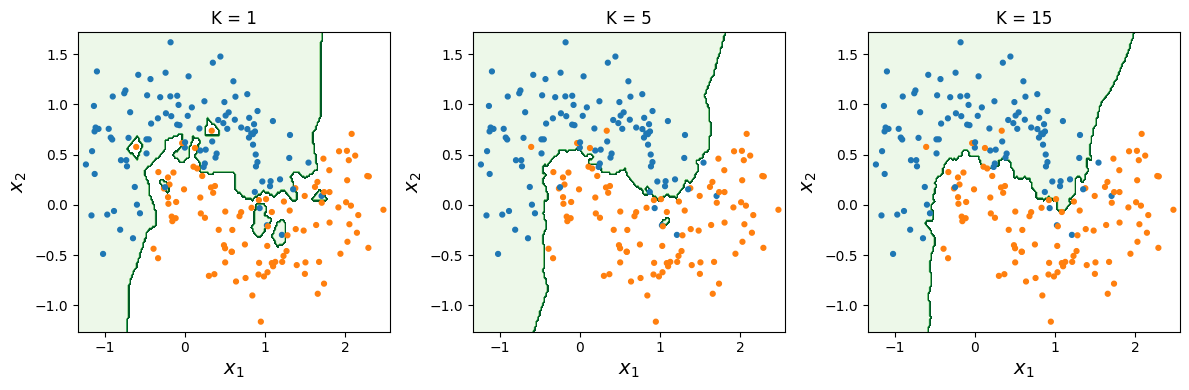

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
i = 0

for k in [1, 5, 15]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    plot_dec_bound(clf, X, y, ax[i])
    ax[i].set_title('K = ' + str(k))
    i = i+1
    
plt.tight_layout()
plt.show()

Cross validation can be used for tuning the hyper-parameter K (number of neighbors).

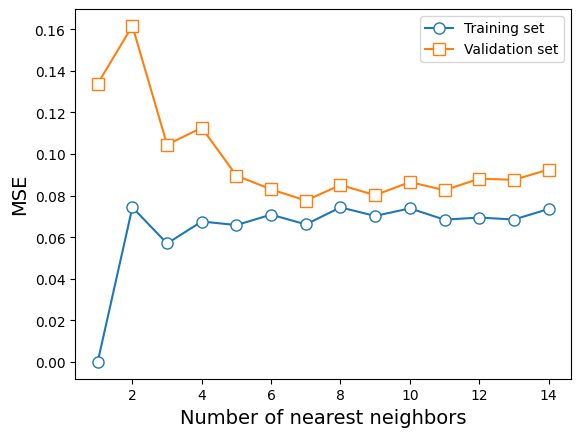

In [7]:
MSE_train = []
MSE_valid = []

k_max = 15
k_range = range(1, k_max)
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    scores = cross_validate(clf, X, y,
                            cv=RepeatedKFold(n_splits=10, n_repeats=50),
                            scoring='neg_mean_squared_error', return_train_score=True)
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())

plt.plot(k_range, MSE_train, "o-", markersize=8, markerfacecolor='white', label='Training set')
plt.plot(k_range, MSE_valid, "s-", markersize=8, markerfacecolor='white', label='Validation set')
plt.xlabel('Number of nearest neighbors', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend(loc='best')
plt.show()

In [8]:
k_opt = k_range[np.argmin(MSE_valid)]

clf = KNeighborsClassifier(n_neighbors=k_opt)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

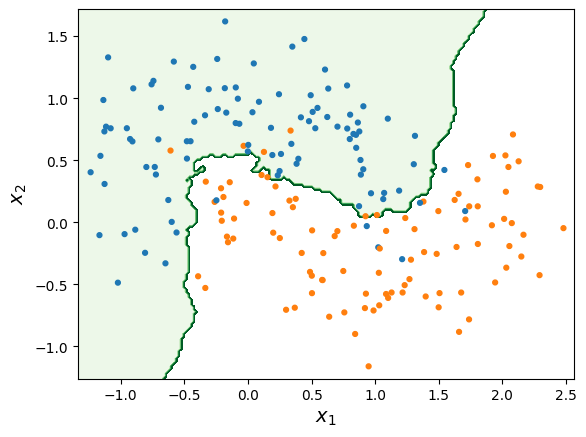

In [9]:
fig, ax = plt.subplots(1, 1)
plot_dec_bound(clf, X, y, ax)
plt.show()

## Suggested activities

* Repeat the examples by increasing the `noise` when generating the data set. What do you observe? Can you explain it? 
* Repeat the examples by changing the type of data set. You can find some synthetic sets [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) under Samples generator.
